# Cinematic Returns: Unveiling the Art and Science of Movie Profitability

# Overview

Our company is entering a new market and has created a movie studio. This analysis uses statistical methods to provide actionable insights into movie profitability and identify peak times for movie releases.

# Business Understanding

The film industry has almost always been considered to be unpredictable and volatile. Despite this, certain production companies thrive within this market. This market analysis aims to identify some underlying factors that may contribute to a movie's box office success. We are aiming to answer these questions:

    - Which genre of movies have the highest ROI?
    - What is the best time to release films for maximum profitability?
    - Is there a direct positive relationship between the amount spent on a movie and the profitability?


## Analysis and Results

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp
import sqlite3
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter, ScalarFormatter

Reading clean data

In [12]:
gross_budget=pd.read_csv('Data/clean_data/gross_budget.csv',index_col=0)

In [13]:
movie_genre_profit=pd.read_csv('Data/clean_data/gross_budget_genre.csv',index_col=0)

In [14]:
gross_budget.head()

,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901
2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105
3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512
4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111


In [15]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


## Analysis and Results

In [16]:
movie_genre_profit.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Adventure,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Animation,8.3,682218.0,24.445,2010-06-17,June
0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761,tt0435761,103.0,Comedy,8.3,682218.0,24.445,2010-06-17,June
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Action,8.8,1841066.0,27.920,2010-07-16,July
1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901,tt1375666,148.0,Adventure,8.8,1841066.0,27.920,2010-07-16,July


In [17]:
corr=movie_genre_profit[['production_budget','net_profit' , 'domestic_gross_y','foreign_gross','worldwide_gross']].corr()

In [18]:
corr

,production_budget,net_profit,domestic_gross_y,foreign_gross,worldwide_gross
production_budget,1.000000,0.654033,0.699290,0.760902,0.777736
net_profit,0.654033,1.000000,0.935265,0.873253,0.984173
domestic_gross_y,0.699290,0.935265,1.000000,0.808757,0.940983
foreign_gross,0.760902,0.873253,0.808757,1.000000,0.903887
worldwide_gross,0.777736,0.984173,0.940983,0.903887,1.000000


## Business Recommendation 1

In [19]:
#group by generes for mean ROI
genres_group_ROI=movie_genre_profit.groupby('genres')['ROI'].mean()
genres_group_ROI.sort_values(ascending=False)

genres
Horror         1266.272146
Mystery        1196.900004
Thriller        722.538868
Sport           370.518995
Documentary     339.749306
Romance         331.405708
Music           308.979671
Sci-Fi          304.973267
Animation       288.559933
Comedy          275.843857
Biography       257.000103
Drama           245.578295
Adventure       237.396481
Fantasy         231.195001
Action          197.524001
Family          181.243727
History         176.870635
Crime           142.333966
Musical         137.381944
Western          84.068855
War              57.951986
Name: ROI, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


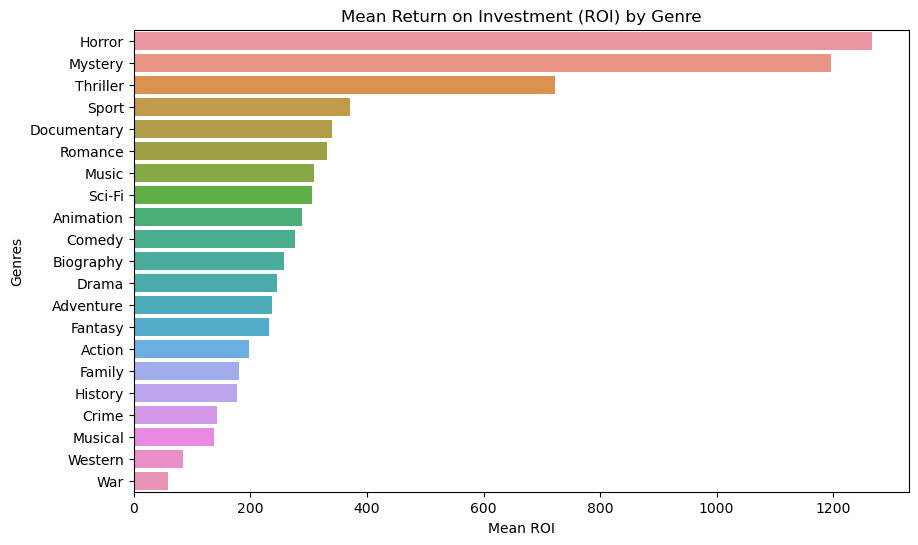

In [20]:
#plotting a simple bar graph to show case the mean ROI accross the genres
genres_group_ROI = genres_group_ROI.sort_values(ascending=False)
plt.figure(figsize=(10, 6),dpi=100)
sns.barplot(x=genres_group_ROI.values, y=genres_group_ROI.index)

plt.title('Mean Return on Investment (ROI) by Genre')
plt.xlabel('Mean ROI')
plt.ylabel('Genres')

plt.savefig('images/Mean_ROI_by_genres.png')

plt.show()

#### 1:Hypothesis testing to check whether their is a siginificant difference in mean ROI among genres

- Null hypothesis: There is no significant difference in mean ROI among genres.
- Alternative hypothesis : There is a significant difference in mean ROI among genres.

In [21]:
#used ANOVA for testing
ROI_by_genre = [movie_genre_profit[movie_genre_profit['genres'] == genre]['ROI'] for genre in movie_genre_profit['genres'].unique()]

f_stats, p_value = f_oneway(*ROI_by_genre)
print(f'p_value is {p_value} and f_stats is {f_stats}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean ROI among genres.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean ROI among genres.")

p_value is 4.677511877963311e-14 and f_stats is 5.4810727247731705
Reject the null hypothesis. There is a significant difference in mean ROI among genres.


C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

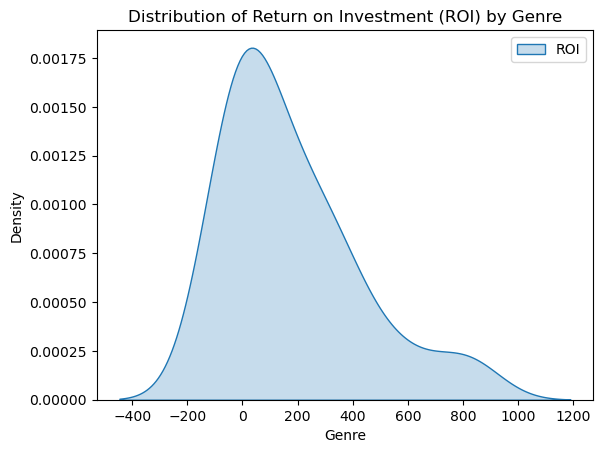

In [23]:
#using box plot showing the distribution of return on investment by genre
plt.figure()

# Using KDE plot instead of boxplot
sns.kdeplot(data=ROI_by_genre, fill=True)
plt.title('Distribution of Return on Investment (ROI) by Genre')
plt.xlabel('Genre')
plt.ylabel('Density')

plt.savefig('images/Distribution_of_ROI_by_genres.png')

plt.show()

Since there is a significant difference in mean ROI among genres and if horror and thrillers exhibit the highest mean ROI, it indicates that these genres, on average, have a more favorable return on investment compared to other genres.

Consider allocating resources and focusing marketing efforts on producing and promoting horror and thriller movies. These genres have shown, on average, higher returns on investment, suggesting a potential business opportunity.

### Business Recommendation 2

In [24]:
#filtered only horror movie genres
profit_month_horror=movie_genre_profit.loc[movie_genre_profit.genres=='Horror']
profit_month_horror.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
16,Resident Evil: Afterlife,240100000,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [25]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_horror.groupby('release_month')['net_profit'].mean()

release_month
April        3.217739e+07
August       9.723526e+07
December     1.986317e+07
February     5.603848e+07
January      6.783270e+07
July         7.946608e+07
June         9.497014e+07
March        3.782651e+07
May          5.988158e+07
November     2.843931e+07
October      7.625264e+07
September    7.715926e+07
Name: net_profit, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


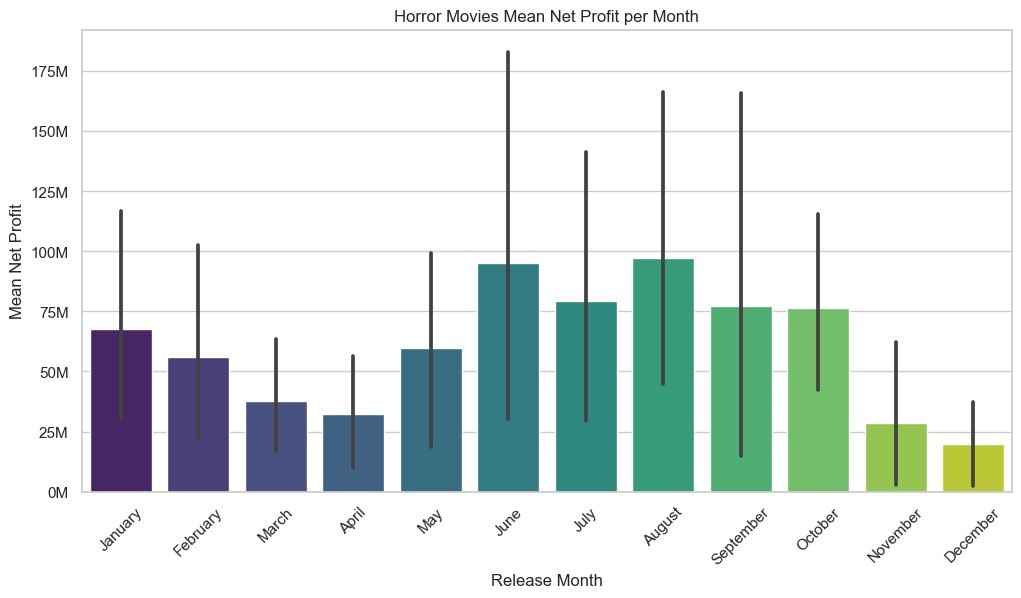

In [26]:
# barplot graph mean profit across each months
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# Function to format axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

sns.barplot(x=profit_month_horror.release_month, y=profit_month_horror.net_profit, order=month_order, palette='viridis')

# Apply the formatter to the x-axis and y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Horror Movies Mean Net Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Net Profit')

plt.savefig('images/horror_movies_mean_profit_per_month.png')
plt.show()



Since there is a significant difference in mean net profit among genres and the analysis has identified June and August as the best months for releasing horror movies based on mean net profit, this indicates a statistically supported pattern in profitability.

Consider strategically planning the release of horror movies during August and September. The statistical evidence suggests that, on average, movies in the horror genre tend to generate higher net profits during these months. This can be a valuable insight for optimizing your release schedule and potentially maximizing returns on horror movie investments.

### Business Recommendation 3

#### Linear Regression

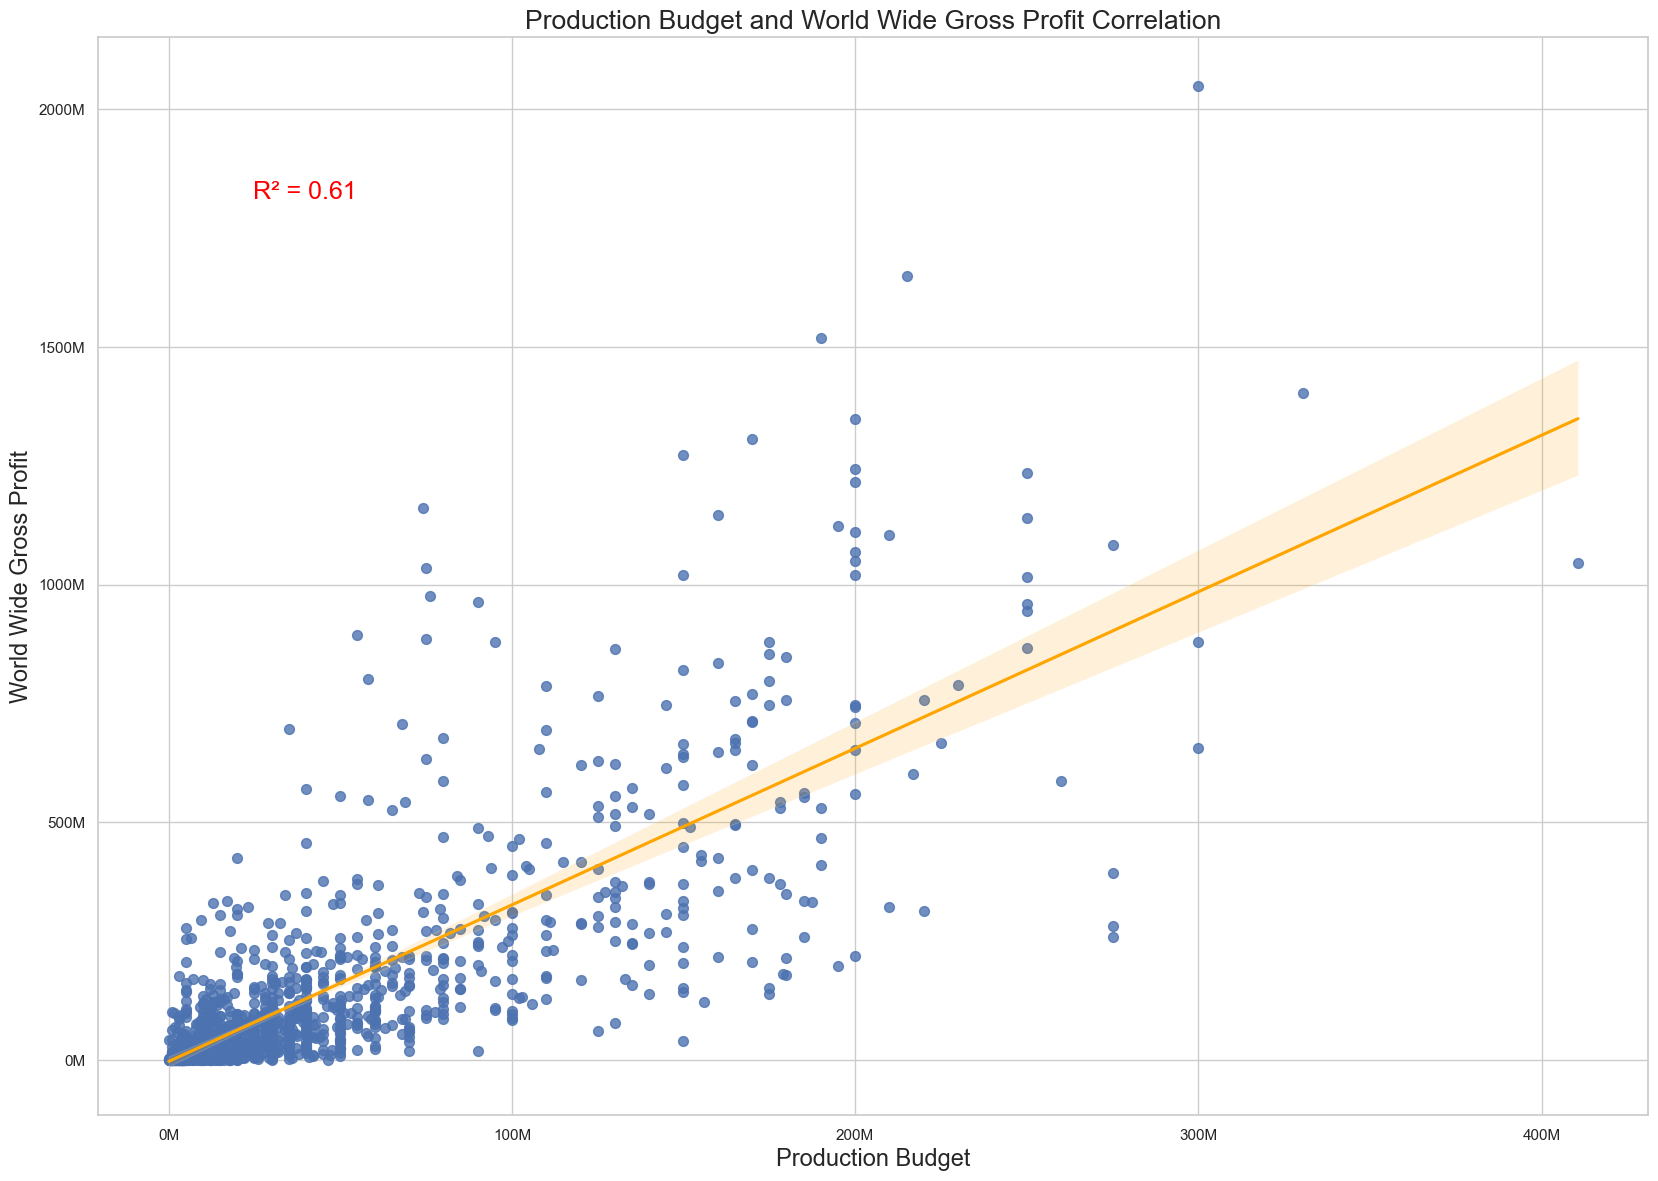

In [27]:
x = gross_budget['production_budget']
y = gross_budget['worldwide_gross']

# Function to format axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

sns.set_style("whitegrid")
plt.figure(figsize=(20, 14))
sns.regplot(x=x, y=y, data=gross_budget, scatter_kws={'s': 50}, line_kws={'color': 'orange'})

# Apply the formatter to the x-axis and y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))


model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
y_pred = model.predict(x.values.reshape(-1, 1))
r_squared = r2_score(y, y_pred)

# Annotate the plot with R-squared value
plt.annotate(f'R² = {r_squared:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=18, color='red')


plt.xlabel('Production Budget', fontsize=17)
plt.ylabel('World Wide Gross Profit', fontsize=17)
plt.title('Production Budget and World Wide Gross Profit Correlation', fontsize=19)

plt.savefig('images/Linear_regression_plot_R2.png')

plt.show()

In the correlation matrix, we set up between the two variables, the correlation coefficient between these two variables was .74. This indicated a strong to moderate relationship between the two variables and was further corroborated by the R2 value of 0.61 and accounts for the variation around the regression line.

From the variation around the line, it is hard to say definitively that the more a company spends on production, the greater the worldwide gross income. To find a production budget range that made a decent worldwide gross income, we looked at the lower 25th percentile in spending. To generate a spending range leading to the best projected worldwide gross income.

# Conclusion

In conclusion, our data-driven strategy focuses on the creation and release of horror films during August and September, taking advantage of the genre's cost-effectiveness and the heightened interest during this period. This targeted approach aims to optimize the balance between production costs and potential revenue, ultimately enhancing the prospects of achieving a robust Return on Investment in the global market.

# Next step 

- Action would be the next genre to focus on, since action tends to have the highest mean profit per month.
- Maximize the profitability: May or June would be the ideal months for release: potentially May and June have the highest mean profits since people are on vacation or students are no longer in school so they have more time for leisure activities. November & December could be another good time to release the movie as well, since people may be on vacation or watch more movies around the holidays
- It should be recognized that action films can entail higher risks, stemming from the elevated budget invested in the    production

In [28]:
#filtered only horror movie genres
profit_month_action=movie_genre_profit.loc[movie_genre_profit.genres=='Action']
profit_month_horror.head()

,title_x,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI,movie_id,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,release_month
16,Resident Evil: Afterlife,240100000,57500000,60128566,295874190,238374190,414.563809,tt1220634,96.0,Horror,5.9,153270.0,0.667,2010-09-10,September
32,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733,tt1536044,91.0,Horror,5.7,93122.0,8.163,2010-10-21,October
41,The Wolfman,77800000,150000000,62189884,142634358,-7365642,-4.910428,tt0780653,103.0,Horror,5.8,97873.0,14.030,2010-02-12,February
58,Piranha 3D,58200000,24000000,25003155,83660160,59660160,248.584000,tt0464154,88.0,Horror,5.4,81327.0,11.302,2010-08-20,August
67,The Last Exorcism,26700000,1800000,41034350,70165900,68365900,3798.105556,tt1320244,87.0,Horror,5.6,45815.0,9.350,2010-08-27,August


In [29]:
#provides the average net profit for horror movies grouped by the month of release
profit_month_action.groupby('release_month')['net_profit'].mean()

release_month
April        3.015766e+08
August       1.035604e+08
December     2.377115e+08
February     9.570244e+07
January      8.818655e+07
July         2.291997e+08
June         3.038578e+08
March        1.444390e+08
May          3.396517e+08
November     2.408561e+08
October      9.189051e+07
September    9.780116e+07
Name: net_profit, dtype: float64

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


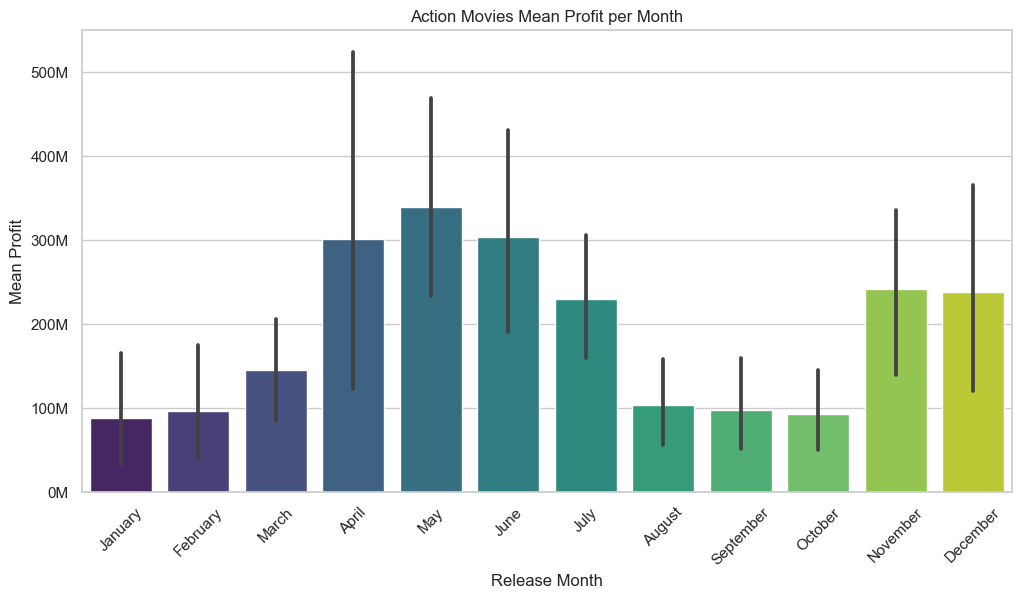

In [30]:
#bar plot to show case the best release time for action movies
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']


def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

sns.barplot(x=profit_month_action.release_month, y=profit_month_action.net_profit, order=month_order, palette='viridis')

# Apply the formatter to the x-axis and y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Action Movies Mean Profit per Month')
plt.xlabel('Release Month')
plt.xticks(rotation=45)
plt.ylabel('Mean Profit')

plt.savefig('images/neax_step_action_movies_mean_profit_per_month.png')
plt.show()